# Apply ML in Predict house price in Real Estate dataset P2
* Name: Ha Ngo
* Email: nvh1211@gmail.com
* Date: 06/06/2024

## Task 3 – Extension

In this task, I will apply 2 other different learning algorithms for modelling the Real estate valuation data set in order to compare their performance with the 2 algorithms apllied in Task 1. Decision Tree and Gradient Boosting regressor algorithms will be applied.

In [1]:
# Import the necessary liblaries:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Load the dataset into pandas DataFrame:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/477/data.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#Remane the columns, remove the outlier of the target variable
df.columns = ['No', 'TransactionDate', 'HouseAge', 'DistanceToMRT', 'NumberOfStores', 'Latitude', 'Longitude', 'HousePricePerUnit']
df = df[df['HousePricePerUnit'] != 117.5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 413
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 413 non-null    int64  
 1   TransactionDate    413 non-null    float64
 2   HouseAge           413 non-null    float64
 3   DistanceToMRT      413 non-null    float64
 4   NumberOfStores     413 non-null    int64  
 5   Latitude           413 non-null    float64
 6   Longitude          413 non-null    float64
 7   HousePricePerUnit  413 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 29.0 KB


In [4]:
# Preprocess the data and Define the variables
X = df.drop(['No','HousePricePerUnit'], axis =1)
y = df['HousePricePerUnit']

In [5]:
# Standardize the features and Split the data into training and testing sets with 80/20 ratio

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 1. Applying Gradient Boosting and Decision Tree Regressor without hyperparameter tuning

In [6]:
# Gradient Boosting
gb = GradientBoostingRegressor()
gb_trained = gb.fit(X_train, y_train)
y_pred_gb = gb_trained.predict(X_test)

In [8]:
# Evaluate the GB model performance
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Performance:")
print(mae_gb)
print(mse_gb)
print(r2_gb)

Gradient Boosting Performance:
4.029601806559145
26.440252435429397
0.8212410408707613


In [9]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt_trained = dt.fit(X_train, y_train)
y_pred_dt = dt_trained.predict(X_test)

In [10]:
# Evaluate the DT model performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print(mae_dt)
print(mse_dt)
print(r2_dt)

Decision Tree Performance:
6.777710843373494
95.74051204819277
0.35271138874218055


Gradient Boosting method has a good performance with the r2_score value at approx 0.82, while Decision Tree Regressor is bad model when apply to this data set with the r2_score is only 0.35. Hyperparameter tuning will be performed to check if the performance of these models can be optimized.

### 2. Applying 2 models with hyperparameters tuning.

For Gradient Boosting, common hyperparameters include n_estimators, learning_rate, max_depth, and subsample.

In [11]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Define the cross-validation strategy
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=folds, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Best hyperparameters for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:")
print(best_params_gb)

Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [12]:
# Evaluate the GB model best performance
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

mae_gb_best = mean_absolute_error(y_test, y_pred_gb)
mse_gb_best = mean_squared_error(y_test, y_pred_gb)
r2_gb_best = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Performance with Best Hyperparameters:")
print(mae_gb_best)
print(mse_gb_best)
print(r2_gb_best)

Gradient Boosting Performance with Best Hyperparameters:
3.921573975665884
25.056974685488566
0.8305931940459222


For Decision Tree, common hyperparameters include max_depth, min_samples_split, and min_samples_leaf.

In [13]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=folds, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:")
print(best_params_dt)

Best Hyperparameters for Decision Tree:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [14]:
# Evaluate the DT model best performance
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

mae_dt_best = mean_absolute_error(y_test, y_pred_dt)
mse_dt_best = mean_squared_error(y_test, y_pred_dt)
r2_dt_best = r2_score(y_test, y_pred_dt)

print("Gradient Boosting Performance with Best Hyperparameters:")
print(mae_dt_best)
print(mse_dt_best)
print(r2_dt_best)

Gradient Boosting Performance with Best Hyperparameters:
4.836254691206801
44.62762537701078
0.6982786801946625


### 3. Compare these 2 model before and after Hyperparameters tunning

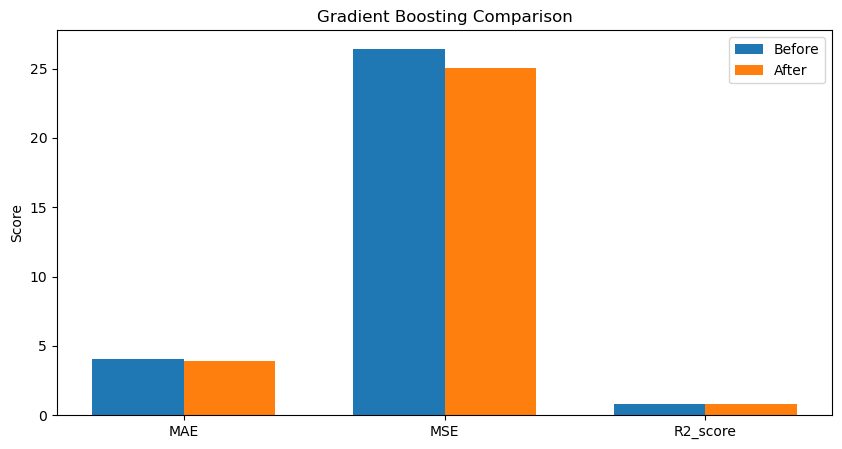

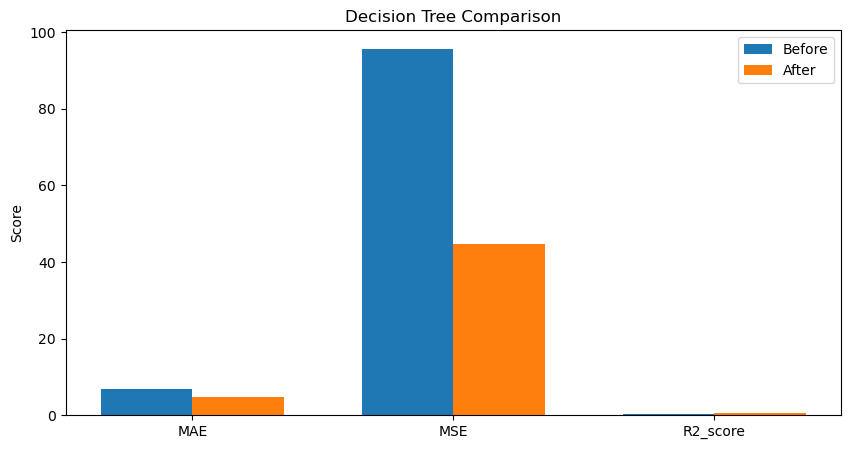

In [19]:
# Metrics for each model before and after tuning
metrics = {
    'Gradient Boosting': {'Before': [mae_gb, mse_gb, r2_gb], 'After': [mae_gb_best, mse_gb_best, r2_gb_best]},
    'Decision Tree': {'Before': [mae_dt, mse_dt, r2_dt], 'After': [mae_dt_best, mse_dt_best, r2_dt_best]}
}

# Setting the positions and width for the bars
pos = np.arange(len(metrics['Gradient Boosting']['Before'])) 
width = 0.35 

# Plotting the bars
for i, model in enumerate(metrics.keys()):
    fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with before-tuning data
    rects1 = ax.bar(pos - width/2, metrics[model]['Before'], width, label='Before') 

    # Create a bar with after-tuning data
    rects2 = ax.bar(pos + width/2, metrics[model]['After'], width, label='After') 

    # Setting the y axis label
    ax.set_ylabel('Score')

    # Setting the chart's title, position, labels
    ax.set_title(model + ' Comparison')
    ax.set_xticks(pos)
    ax.set_xticklabels(['MAE', 'MSE', 'R2_score'])
    ax.legend()

After tuning, Decision Tree model showed a significant improvement in performance, with the r2 score nearly doubling from 0.35 to 0.698. Gradient Boosting still a good model for this data set while showed a slight improvement in performance, with the r2 score increasing from 0.82 to 0.83